In [2]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Input, Convolution2D, Flatten, MaxPooling2D, UpSampling2D, Dense
from process_images import *
from PIL import Image


Using Theano backend.


In [3]:
X = []
y = []


for file in glob.glob("data/BioID/*.pgm"):
    img = Image.open(file)
    img = imcrop(img, (128, 128))
    img = np.asarray(img)
    img = np.reshape(img, (128, 128, 1))
    X.append(img / 255.0)
    y.append(img / 255.0)

indices = range(len(X))

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.2)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


In [4]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', activation="relu", input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2), border_mode='same'))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation="relu"))
model.add(MaxPooling2D((2, 2), border_mode='same'))
model.add(Convolution2D(16, 3, 3, border_mode='same', activation="relu"))
model.add(MaxPooling2D((2, 2), border_mode='same'))
model.add(Convolution2D(8, 3, 3, border_mode='same', activation="relu"))
model.add(MaxPooling2D((2, 2), border_mode='same'))

model.add(Convolution2D(8, 3, 3, border_mode='same', activation="relu"))
model.add(UpSampling2D((2, 2)))
model.add(Convolution2D(16, 3, 3, border_mode='same', activation="relu"))
model.add(UpSampling2D((2, 2)))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation="relu"))
model.add(UpSampling2D((2, 2)))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation="relu"))
model.add(UpSampling2D((2, 2)))
model.add(Convolution2D(1, 3, 3, border_mode='same', activation="sigmoid"))
model.compile(loss='mse', optimizer='rmsprop')

In [5]:
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 128, 128, 64)  640         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 64, 64, 64)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 64, 64, 32)    18464       maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 32, 32, 32)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [6]:
model.fit(X_train, y_train, nb_epoch=10, batch_size=10, verbose=1)
results = model.predict(X_test, batch_size = 16, verbose=1)

Epoch 1/10
1216/1216 [==============================] - 302s - loss: 0.0294   
Epoch 2/10
1216/1216 [==============================] - 305s - loss: 0.0175   
Epoch 3/10
1216/1216 [==============================] - 305s - loss: 0.0144   
Epoch 4/10
1216/1216 [==============================] - 303s - loss: 0.0130   
Epoch 5/10
1216/1216 [==============================] - 299s - loss: 0.0118   
Epoch 6/10
1216/1216 [==============================] - 270s - loss: 0.0113   
Epoch 7/10
1216/1216 [==============================] - 275s - loss: 0.0105   
Epoch 8/10
1216/1216 [==============================] - 284s - loss: 0.0101   
Epoch 9/10
1216/1216 [==============================] - 290s - loss: 0.0096   
Epoch 10/10
305/305 [==============================] - 19s    


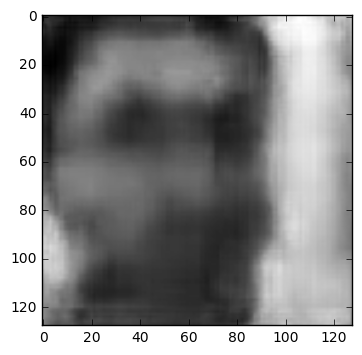

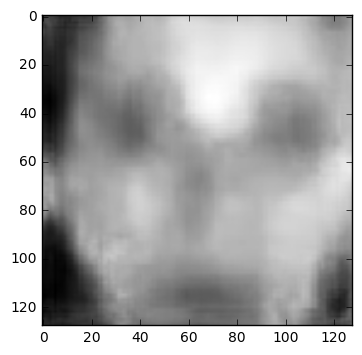

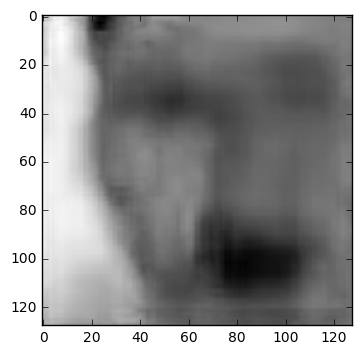

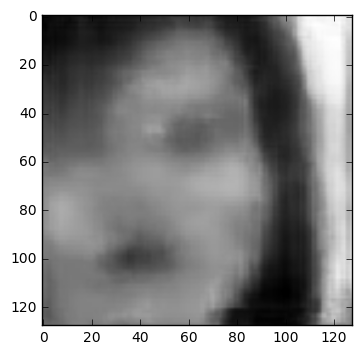

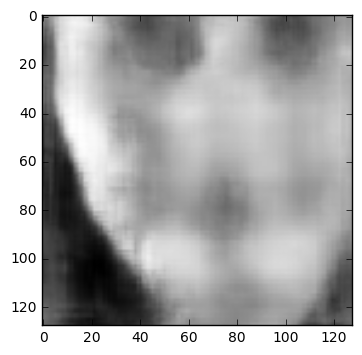

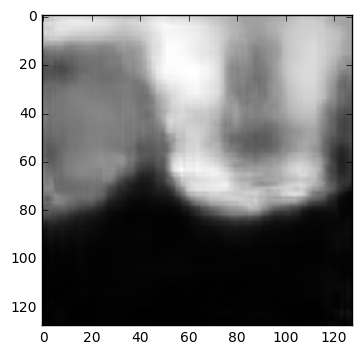

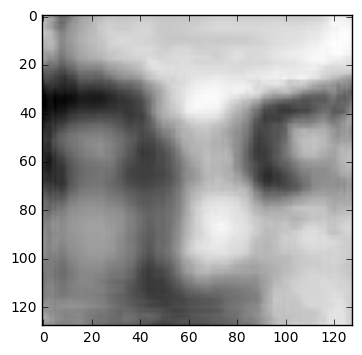

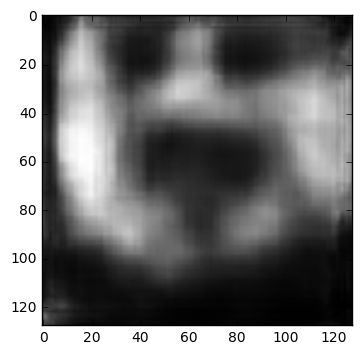

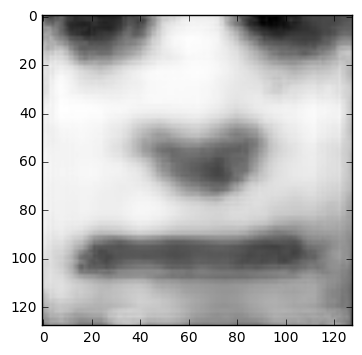

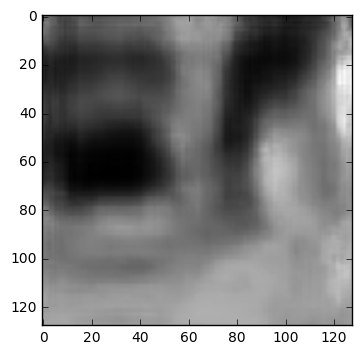

In [10]:
for img in results[:10]:
    img = np.reshape(img, (128, 128))
    plt.imshow(img, cmap='gray')
    plt.show()

In [9]:
model.evaluate(X_test, y_test, batch_size = 16, verbose=1)

305/305 [==============================] - 22s    


0.0082581311097887702

In [11]:
model.save_weights()

TypeError: save_weights() missing 1 required positional argument: 'filepath'

In [12]:
model.save("autoencodermodel.h5")

In [13]:
model.save_weights('autoencoder_weights.h5')